## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [175]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv("./motorbike_ambulance_calls.csv")

summary_stats = dataset.describe()
headers = dataset.columns.tolist()
dataset_size = dataset.shape

print(dataset.head(10), "\n\n")

for column in headers:
    max_in_column = dataset[column].max()
    min_in_column = dataset[column].min()
    print(f"Max in column {column} is {max_in_column} and min is {min_in_column}")

print(f"\nDataset size is {dataset_size}")
print(f"\n\nDataset stats: \n{summary_stats}")

   index    date  season  yr  mnth  hr  holiday  weekday  workingday  \
0      1  1/1/11  spring   0     1   0        0        6           0   
1      2  1/1/11  spring   0     1   1        0        6           0   
2      3  1/1/11  spring   0     1   2        0        6           0   
3      4  1/1/11  spring   0     1   3        0        6           0   
4      5  1/1/11  spring   0     1   4        0        6           0   
5      6  1/1/11  spring   0     1   5        0        6           0   
6      7  1/1/11  spring   0     1   6        0        6           0   
7      8  1/1/11  spring   0     1   7        0        6           0   
8      9  1/1/11  spring   0     1   8        0        6           0   
9     10  1/1/11  spring   0     1   9        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  
0           1  0.24  0.2879  0.81     0.0000   16  
1           1  0.22  0.2727  0.80     0.0000   40  
2           1  0.22  0.2727  0.80     0.0000   32  

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [176]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB
None


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [177]:
missing_values = dataset.isna().sum()

print(missing_values)

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**

Я так багато написав в 1. тому що пропустив опис датасету.



1.  Працюємо з даними де date задана строкою. Колонка yr має лише 2 значення: 0 та 1, відповідно до першого та другого року збору даних. Місяць рахується від 1, а не від 0. Година в 24-годинному форматі. Holiday колонка має значення 0 та 1, відповідно позначаючи false і true. Weekday - дні тижня індексацією. workingday - 0 та 1, false та true відповідно, позначаючи чи робочий день. weathersit - значення від 0 до 4 вказують наскільки погані погодні умови, 0 будучи найкращими, а 4 - найгіршими. temp - між 0.02 та 1, вказує на темпаратуру, зведену до проміжку даного проміжку. atemp - від 0 до 1 вказує на те, як відчувається темпаратура. hum - від 0 до 1 вказує на вологість повітря. windspeed - між 0.0 та 0.8507 вказує на швидкість вітру.
2. Не враховуючи змінну index у нас 14 колонок, з яких 12 - числові. 
3. В даному датасеті немає пропущених значень в жодній з колонок.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [178]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name], format='%m/%d/%y')
  return df
  
dataset = tranform_date(dataset, 'date')

In [179]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

get_time_limits(dataset, 'date')

First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


Тепер відомо що працюємо з даними від 1 січня 2011 року, до 31 грудня 2012 року.

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [180]:
columns_to_add_categorical = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
data_categorical = dataset[columns_to_add_categorical].copy()

**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [181]:
season_to_numeric = {"spring": 0, "summer": 1, "autumn": 2, "winter": 3}

def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name] = dataset[season_col_name].map(season_to_numeric)
  return df
  
data = encode_season(dataset, 'season')

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

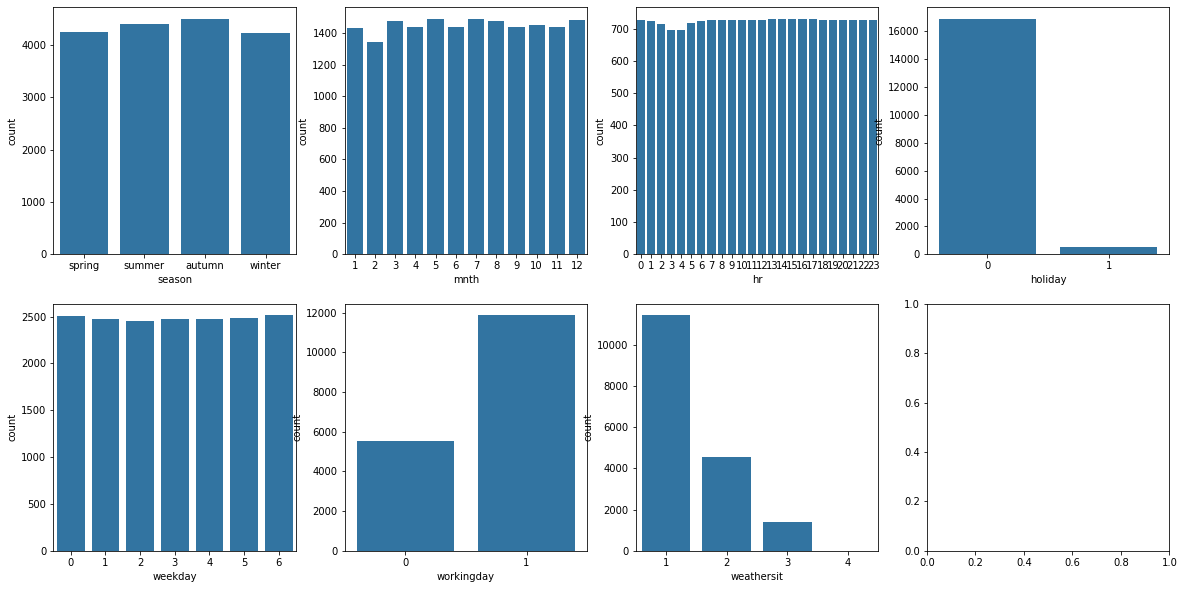

In [182]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(x=variable, data=data_categorical, ax=subplot)

plt.show()

**Висновки з 5-7 завдання (детальні)**



1. Половина колонок в датасеті - категоріальні. 
2. Немає прямого звʼязку між кількістю аварій та порою року.
3. Немає сильного звяʼзку між кількістю аварій та місяцем.
4. Помітно що від 3 до 4 години найменше аварій, ймовірно звʼязано з меншою кількістю транспорту на дорозі.
5. Немає звяʼзку між кількістю аварій та днем тижня.
6. Більше аварій в робочий день, але робочих днів загалом більше тому це не вказує ні на що.
7. Чим гірша погода тим менша кількість аварій, але це також не вказує ні на що адже днів з хорошою погодою більше.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [183]:
columns_to_add = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
data_numerical = dataset[columns_to_add].copy()

**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

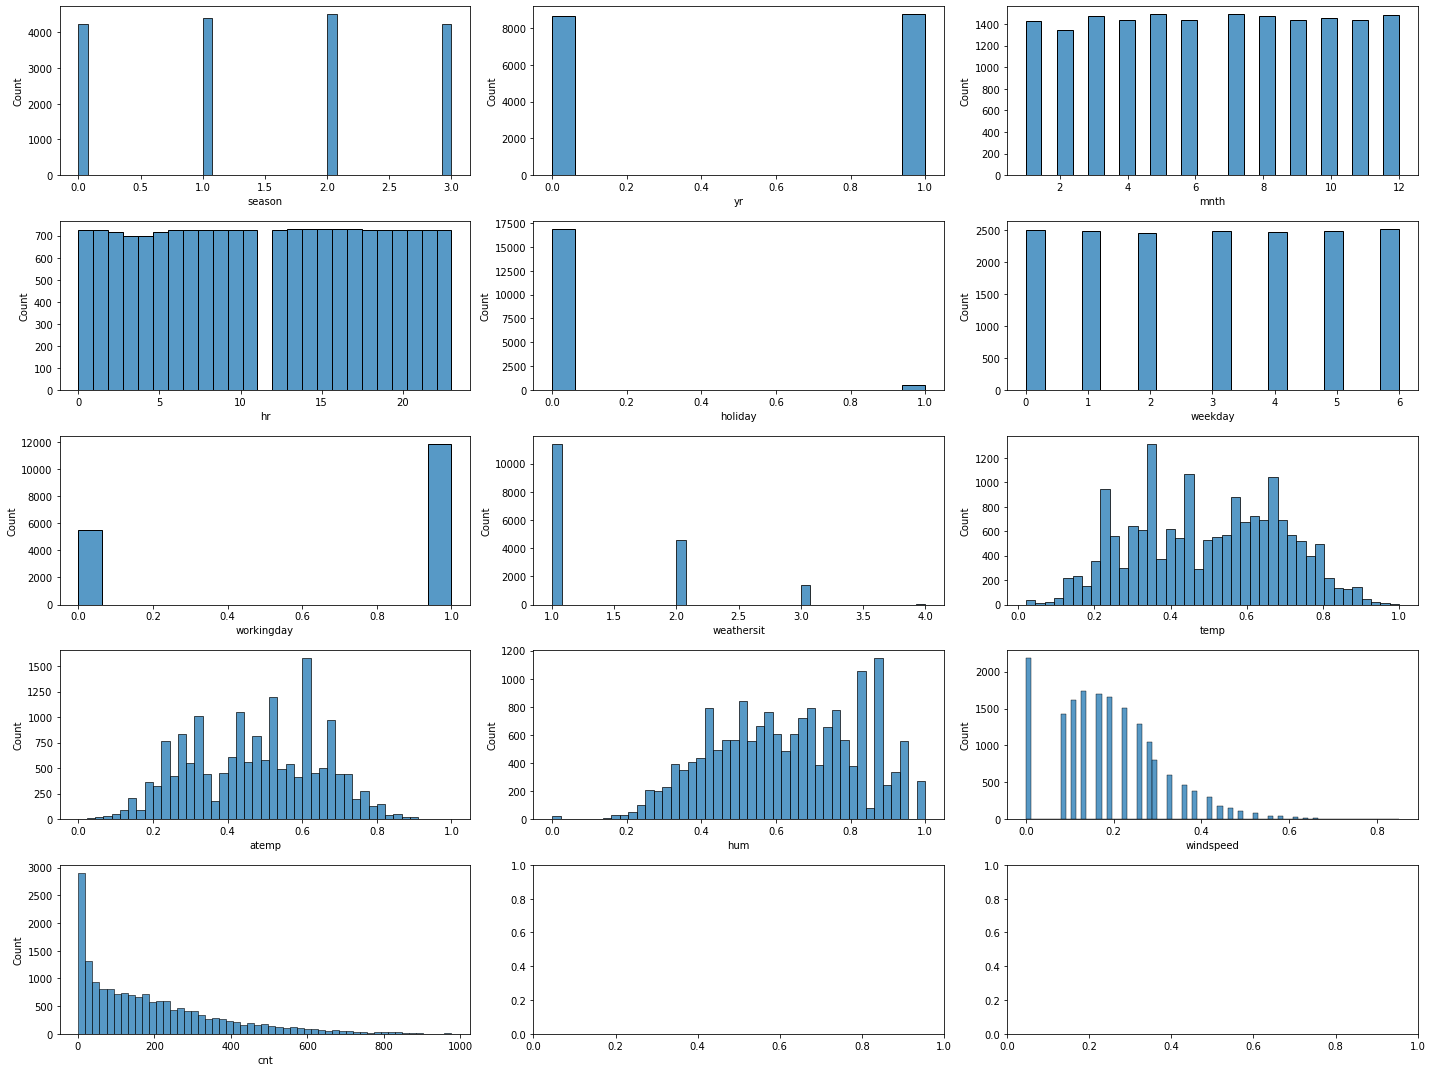

In [184]:
fig, ax = plt.subplots(5, 3, figsize=(20, 15))
for variable, subplot in zip(data_numerical, ax.flatten()):
    sns.histplot(x=variable, data=data_numerical, ax=subplot)

plt.tight_layout()
plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

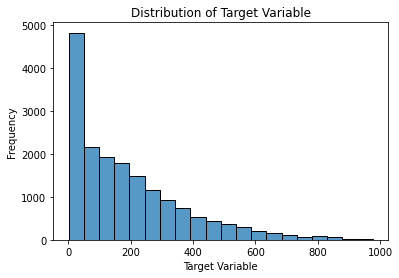

Coeficient: [0.01006461]
Intercept: 102.00163079471261


In [185]:
sns.histplot(data=dataset, x='cnt', bins=20)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

X = dataset[['index']]
y = dataset['cnt']
model = LinearRegression()
model.fit(X, y)
slope_coefficients = model.coef_
intercept = model.intercept_

print(f"Coeficient: {slope_coefficients}\nIntercept: {intercept}")

**Висновки з 8-10 завдання (детальні)**



1. Чим менша швидкість вітру, тим більше аварій.
2. Частково чим вища вологість, тим більше аварій. Коли вологість досягає максимальних значень в наборі даних, - то кількість аварій зменшується.
3. В 10 завданні розподіл  близький до експоненціального з коефіцієнтом нахилу 0.01



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

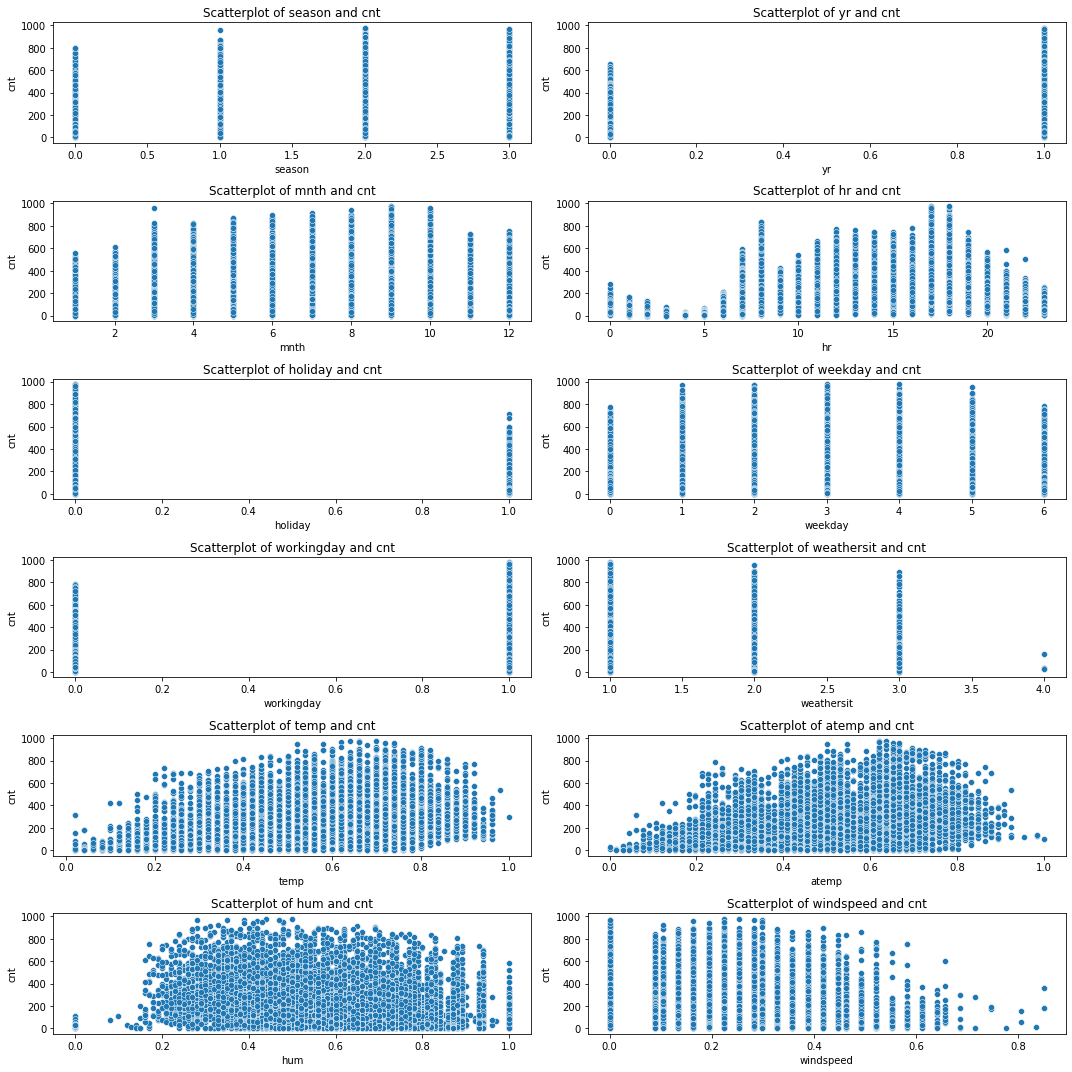

In [186]:
fig, ax = plt.subplots(6,2, figsize=(15, 15))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
    sns.scatterplot(x=var, y='cnt', data=data_numerical, ax=subplot)
    subplot.set_title(f"Scatterplot of {var} and cnt")
    
fig.tight_layout()

Не впевнений чи треба було категоріальні змінні, які також є числовими, включати в числові, але за це нічого не написано, тому я залишаю це так.

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

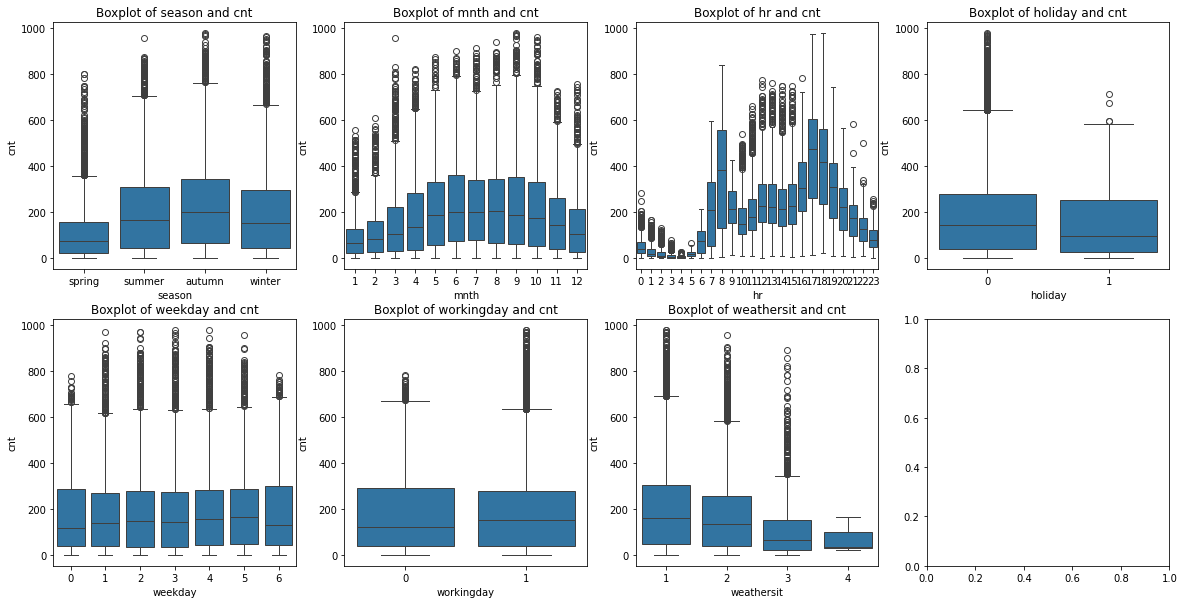

In [187]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
    sns.boxplot(x=data_categorical[var], y=dataset['cnt'], ax=subplot)
    subplot.set_title(f"Boxplot of {var} and cnt")

**Висновки з 11-12 завдання (детальні)**



1. Весною найменша кількість максимальних дзвінків на день.
2. У другий рік збору інформації набагато більше максимальна кількість денних дзвінків.
3. Піки кількості дзвінків зранку, та ввечері. Також стабільно тримається висока кількість дзвінгків в час пік з 12 години.
4. Максимальна кількість дзвінків на свята помітно менша.
5. В понеділок та неділю найменша кількість дзвінків.
6. Чим гірша погода, тим менша максимальна кількість дзвінків у дні. Спостережень на найгірші погодні умови достатньо мало, але максимальна кількість 200, що є мало порівняно з іншими.
7. Кількість дзвінків росте з темпаратурою до 0.7, після чого стрімко спадає.
8. Чим більша швидкість вітру, тим менше спостережень, але з натяжкою можна сказати, що тим і менша кількість дзвінків. Не враховуючи максимальну кількість вітру в датасеті.
9. Завдяки боксплотам стало помітно  яка кількість дзвінків є високою для якої категорії. На counterplot кількість дзвінків яка перевищувала близько 600, здавалось нормою, а боксплот показав що часто це є зона аутлаєрів.



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

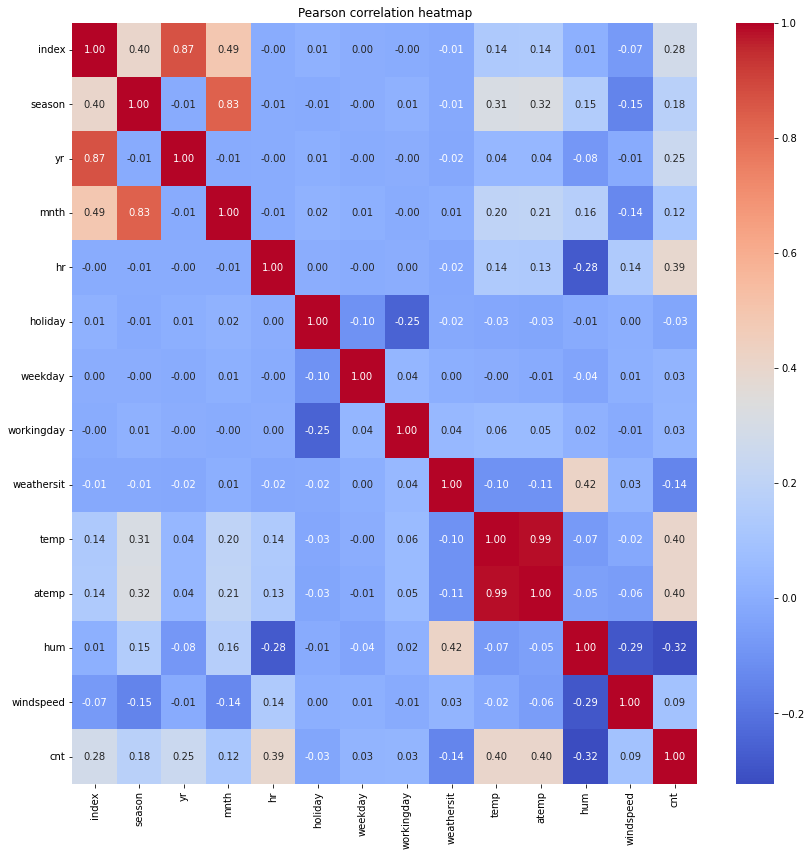

In [188]:
pearson_corr =  dataset.corr(method='pearson')

plt.figure(figsize=(14, 14))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson correlation heatmap')
plt.show()

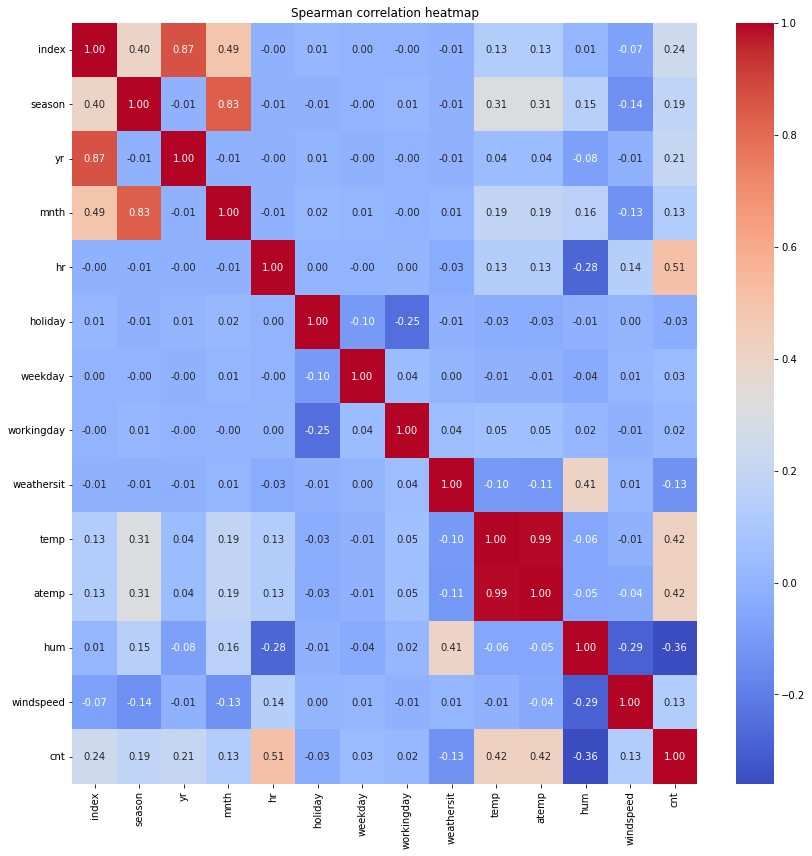

In [189]:
spearman_corr = data.corr(method='spearman')

plt.figure(figsize=(14,14))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman correlation heatmap")
plt.show()

Переглянувши коефіцієнти в методі Пірсона та Спірмана помітно, що в метода Спірмана значення як правило дорівнює, або більше від значень метода Пірсона. І це логічно, так як метод Спірмана шукає монотонний звʼязок між змінними, тим часом Пірсона - лінійний. Якщо хоч якийсь лінійний звяʼзок присутній, то як правило - тим більше й простий звʼязок між змінними, що робить коефіцієнт вищим(це мій аналіз, можу помилятись).

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [190]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 2.0 MB
None


In [209]:
def get_dummies(df: pd.DataFrame):
    features = df.copy()
    
    for var in columns_to_add_categorical:
        dummies = pd.get_dummies(df[var], prefix=var)
        features = pd.concat([features, dummies], axis=1)  # Concatenate dummies with features DataFrame
        features = features.drop(var, axis=1)
        print(f"current variable {var}")
        
    return features

In [210]:
features = get_dummies(dataset)

current variable season
current variable mnth
current variable hr
current variable holiday
current variable weekday
current variable workingday
current variable weathersit


2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [211]:
features['night_hours'] = dataset['hr'].apply(lambda x: 1 if (x >=0 and x<= 6) or (x>=20 and x<=23) else 0)

In [212]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         17379 non-null  int64         
 1   date          17379 non-null  datetime64[ns]
 2   yr            17379 non-null  int64         
 3   temp          17379 non-null  float64       
 4   atemp         17379 non-null  float64       
 5   hum           17379 non-null  float64       
 6   windspeed     17379 non-null  float64       
 7   cnt           17379 non-null  int64         
 8   season_0      17379 non-null  uint8         
 9   season_1      17379 non-null  uint8         
 10  season_2      17379 non-null  uint8         
 11  season_3      17379 non-null  uint8         
 12  mnth_1        17379 non-null  uint8         
 13  mnth_2        17379 non-null  uint8         
 14  mnth_3        17379 non-null  uint8         
 15  mnth_4        17379 non-null  uint8 

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

Пояснення: atemp - це інформація яка не впливає на аварії. Це субʼєктивне відчуття темпаратури, що не впливає на те, яка погода та темпаратура є насправді. date - змінна величина якої більше 700 значень, фактично позначаючи кожен день, схоже до index, також для машинного навчання потрібні категоріальні або числові значення. В нас є змінна hr, mnth, season, yr. Вони містять всю інформацію, яку могла б надати date.

In [206]:
features_lr = features.drop(['season_0', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)

In [213]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
    X = df.drop(columns=[target], axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
    return X_train, X_test, y_train, y_test

In [214]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [216]:
def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model = train_linear_model(X_train, y_train)

In [217]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10448.098, test: 10101.710
R^2 train: 0.688, test: 0.680


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

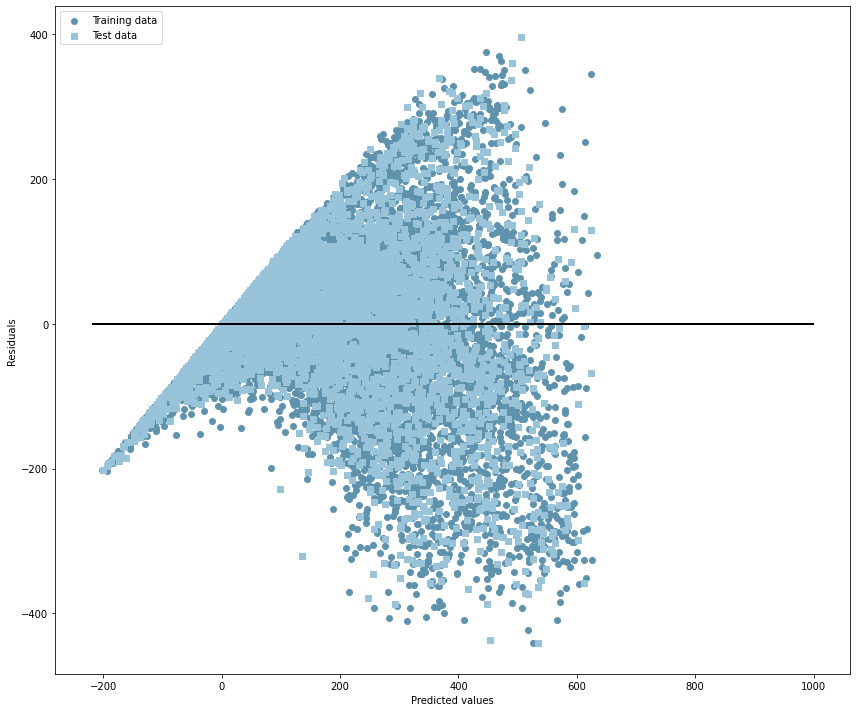

In [220]:
plt.figure(figsize=(12,10))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1. Я дуже щасливий воно працює.
2. Точність моделі: 0.688
3. Накладання тестових і тестувальних даних означає що між ни ми невелика різниця.

